In [38]:
import h5py
import numpy as np
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

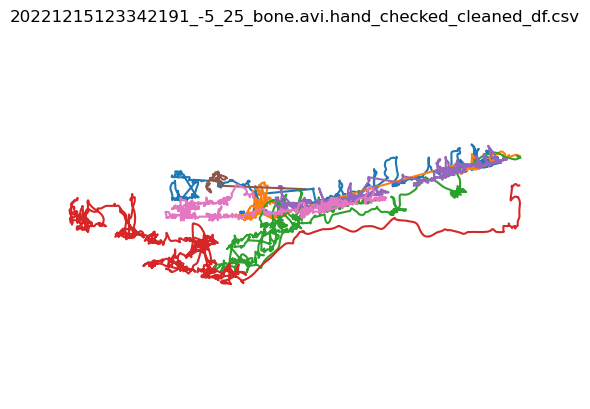

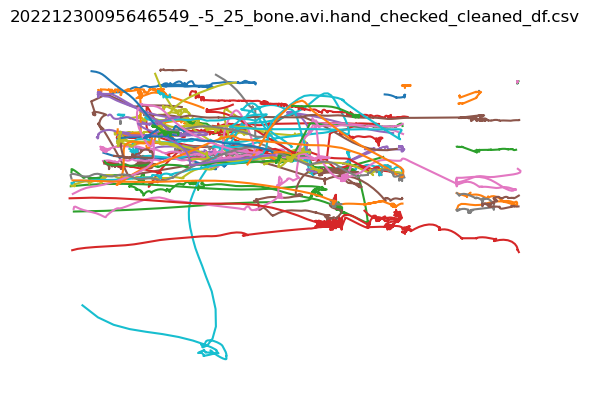

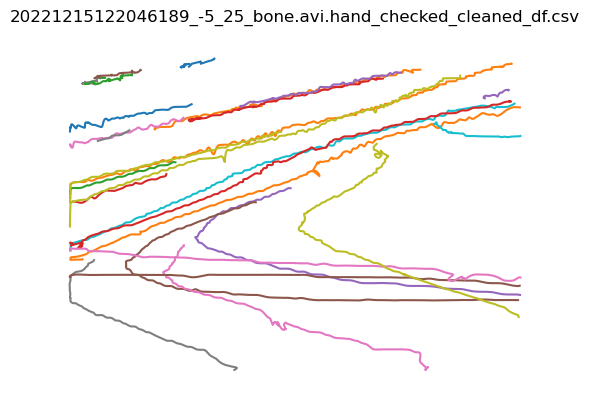

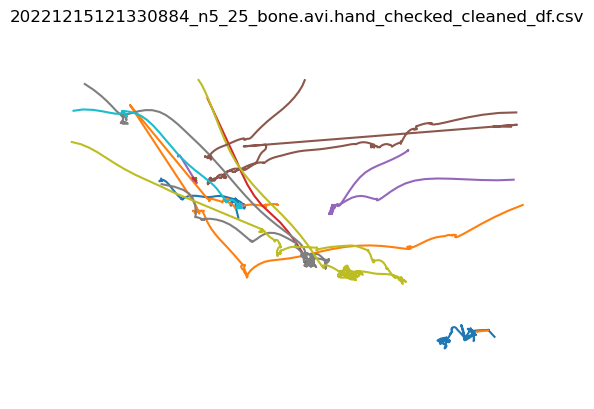

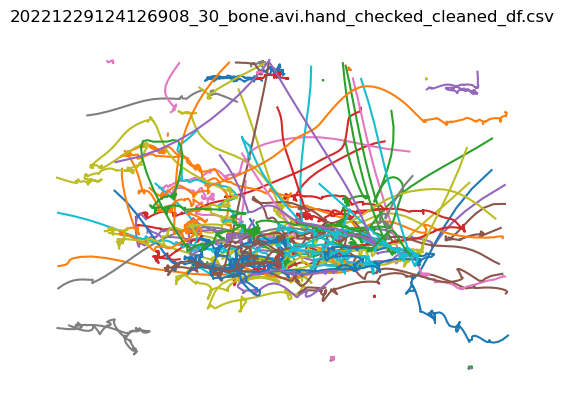

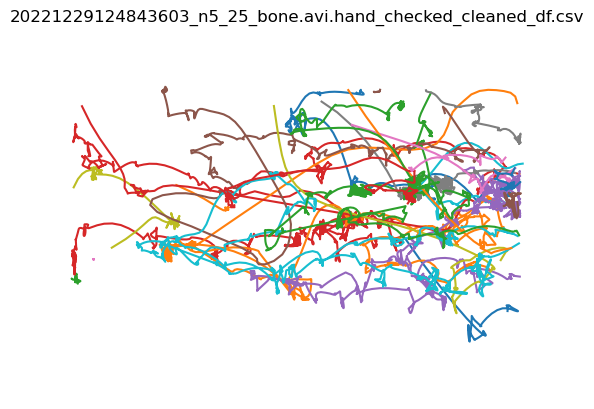

In [42]:
# Load data and plot trajectories
folder_from_colab = '../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/'
csv_files = [f for f in os.listdir(folder_from_colab) if f.endswith('df.csv')]
for file in csv_files:
    filename = os.path.join(folder_from_colab, file)
    df = pd.read_csv(filename)
    # plot the trajectories
    unique_birds = df['bird'].unique()
    # new figure
    plt.figure()
    

    for bird in unique_birds:
        df_bird = df[df['bird'] == bird]
        plt.plot(df_bird['x'], df_bird['y'])
    plt.axis('equal')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title(file)


../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/20221215123342191_-5_25_bone.avi.hand_checked_cleaned_df.csv
../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/20221230095646549_-5_25_bone.avi.hand_checked_cleaned_df.csv
../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/20221215122046189_-5_25_bone.avi.hand_checked_cleaned_df.csv


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2400x2400', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', '../data/central_park_birds_2022/visualizations/20221215121330884_n5_25_bone.avi.hand_checked_cleaned_df.csv_trajectories.mp4']' returned non-zero exit status 255.

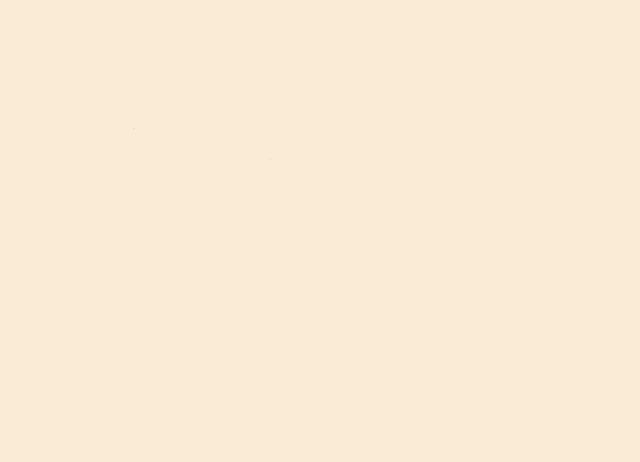

In [46]:
# load each of the analysis files, make a video
# TAKES A WHILE (10-15 minutes) TO RUN, FINE TO SKIP
import real_data_plotting
from importlib import reload
reload(real_data_plotting)



folder_from_colab = '../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/'
csv_files = [f for f in os.listdir(folder_from_colab) if f.endswith('_df.csv')]
save_dir_mp4 = '../data/central_park_birds_2022/visualizations/'

for file in csv_files:
    filename = os.path.join(folder_from_colab, file)
    df = pd.read_csv(filename)
    # take only the part of the filename before the _df.csv
    filename_mp4 = os.path.split(filename)[1].split('_df.csv')[0]+'_trajectories.mp4'
    save_path_video = os.path.join(save_dir_mp4, filename_mp4)
    real_data_plotting.generate_bird_trajectories_video(df, save_path_video, fps=60, frames=None, max_history=200)
    print(filename)
